In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, classification_report, confusion_matrix

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
data = pd.read_excel('ABBREV.xlsx')

In [4]:
df = data.copy()

In [5]:
df.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [7]:
df.drop(['GmWt_Desc1', 'GmWt_Desc2'], axis = 1, inplace = True)

In [8]:
df.sample(5)

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
8332,"FISH,PIKE,NORTHERN,LIVER (ALASKA NATIVE)",69.80,156,16.60,8.00,1.30,4.30,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2562,"PORK,FRSH,SHLDR,(BOSTON BUTT),BLADE (STEAKS),L...",74.31,132,18.73,5.71,0.88,0.00,0.0,0.0,14.0,...,0.6,22.0,0.0,1.998,2.484,0.620,60.0,85.0,258.0,32.0
4647,"OYSTER,EASTERN,CANNED",85.14,68,7.06,2.47,1.42,3.91,0.0,0.0,45.0,...,0.0,1.0,0.1,0.631,0.250,0.739,55.0,85.0,248.0,0.0
4497,"COD,ATLANTIC,CKD,DRY HEAT",75.92,105,22.83,0.86,1.49,0.00,0.0,0.0,14.0,...,1.2,46.0,0.1,0.168,0.124,0.292,55.0,85.0,180.0,0.0
7732,"SNACKS,GRANOLA BARS,SOFT,ALMOND,CONFECTIONERS ...",8.74,455,8.60,20.00,2.53,60.13,4.3,34.0,136.0,...,0.0,0.0,1.5,5.668,9.491,3.643,0.0,35.0,NaN,0.0


In [9]:
df.isnull().sum()

Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(µg)      3270
Lycopene_(µg)        3292
Lut+Zea_ (µg

In [11]:
df.shape

(8790, 50)

In [12]:
X = df.drop('Shrt_Desc', axis = 1)

In [13]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [14]:
df_imputed.sample(5)

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
7534,64.99,168.0,29.49,5.57,1.14,0.00,0.0,0.000000,4.0,1.88,...,0.100000,5.000000,15.631586,1.850000,2.017000,0.280000,67.000000,85.0,250.747668,0.0
6124,15.00,347.0,2.30,2.64,0.57,79.37,0.6,51.350000,8.0,0.28,...,0.579269,22.990142,15.631586,0.540000,1.880000,0.140000,0.000000,40.0,250.747668,0.0
8670,91.50,28.0,1.10,0.30,1.90,5.20,2.2,2.000000,28.0,0.23,...,0.000000,0.000000,0.500000,0.092000,0.050000,0.135000,0.000000,150.0,250.747668,0.0
5011,63.33,90.0,8.19,0.31,13.74,14.44,0.3,5.630000,11.0,0.43,...,0.000000,0.000000,0.000000,0.020000,0.032000,0.089000,0.000000,15.0,4.900000,0.0
2019,7.47,379.0,21.75,5.58,4.67,60.53,9.9,8.543066,600.0,22.00,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,8.9,128.000000,0.0


In [15]:
df_imputed.isna().sum()

Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg)           0
FA_Sat_(g)           0
FA_Mono_(g)

<Axes: >

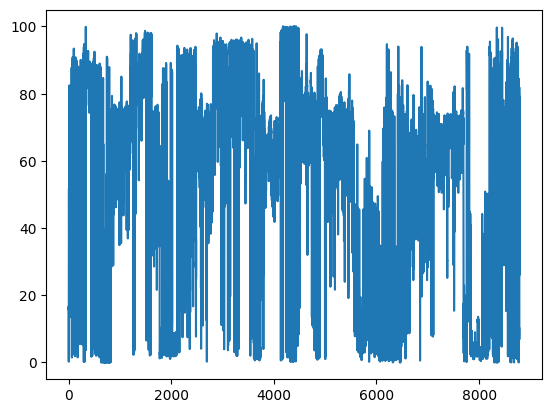

In [17]:
df_imputed['Water_(g)'].plot()

In [18]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_imputed)

In [20]:
X_scaled[0]

array([1.58700000e-01, 7.94900222e-01, 9.62409420e-03, 8.11100000e-01,
       2.11422846e-02, 6.00000000e-04, 0.00000000e+00, 6.01202405e-04,
       3.25909832e-03, 1.61812298e-04, 2.56081946e-03, 2.41984271e-03,
       1.45454545e-03, 1.65901233e-02, 9.89554700e-04, 0.00000000e+00,
       0.00000000e+00, 5.21648409e-04, 0.00000000e+00, 2.13903743e-04,
       1.94285714e-03, 3.29411765e-04, 3.18840580e-03, 2.50000000e-04,
       7.92393027e-04, 0.00000000e+00, 1.28205128e-03, 5.10117327e-04,
       7.82257729e-03, 1.71908181e-03, 2.49900000e-02, 2.28000000e-02,
       2.23666667e-02, 0.00000000e+00, 3.68375650e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.55287818e-02, 0.00000000e+00,
       0.00000000e+00, 4.08282298e-03, 5.37322176e-01, 2.51179964e-01,
       4.07783123e-02, 6.93548387e-02, 4.13886308e-03, 2.41402232e-03,
       0.00000000e+00])

In [27]:
X.shape

(8790, 49)

In [21]:
from sklearn.neighbors import NearestNeighbors

# Create the KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_scaled)

In [22]:
# Function to get recommendations based on user input
def get_recommendations(user_input):
    user_input_scaled = scaler.transform([user_input])
    distances, indices = knn.kneighbors(user_input_scaled)
    return df.iloc[indices[0]]


In [24]:
user_input = [15.87,717,0.85,81.11,2.11,0.06,0,0.06,24,0.02,2,24,24,643,0.09,0,0,1,0,0.005,0.034,0.042,0.11,0.003,3,0,3,3,18.8,0.17,2499,684,671,0,158,0,0,2.32,0,0,7,51.368,21.021,3.043,215,5,14.2,1,0
]

In [25]:
len(user_input)

49

In [30]:
recommendations = get_recommendations(user_input)
recommendations['Shrt_Desc']

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


679     OIL,SAFFLOWER,SALAD OR COOKING,LINOLEIC,(OVER ...
685                                         OIL,GRAPESEED
8605                            OIL,FLAXSEED,COLD PRESSED
819           OIL,FLAXSEED,CONTAINS ADDED SLICED FLAXSEED
787                USDA CMDTY FD,OIL,VEG,LO SATURATED FAT
Name: Shrt_Desc, dtype: object

#### DIMESION REDUCTION 

In [31]:
from sklearn.decomposition import PCA

# Reduce dimensions to a more manageable number (e.g., 10)
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

# Fit KNN on the reduced dataset
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_reduced)